# Линейная регрессия

## 1. Поиск градиента

Продолжить формулу для взятия векторной производной по х для функции квадрата ошибки <br>(в красивом формате со всеми значками угловых скобок, операторов и т. д.). После выполнения этого вы вспомните формулу градиента для квадратичной ошибки и поймете как писать формулы на языке математической верстки TeX

$$ f(x) = ||Ax-y||^2 = (Ax-y)^T(Ax-y) = (A^Tx^T - y^T)(Ax - y) = AA^Tx^Tx - A^Tx^Ty -y^TAx + y^Ty $$
$$y^T = 1 х n, A = n х m, x = m х 1 => y^TAx - Скаляр $$
$$y^TAx = (y^TAx)^T = A^Tx^Ty$$
$$f(x) = AA^Tx^Tx - 2A^Tx^Ty + y^Ty$$
$$\nabla f(x) = \nabla f_1(x) - 2\nabla f_2(x) + \nabla f_3(x)$$
$$f_1(x) = AA^Tx^Tx = x^TBx$$
$$\nabla(x^TBx) = 2Bx => \nabla f_1(x) = 2A^TAx$$
$$f_2(x) = x^TA^Ty = x^Tc$$
$$\nabla(x^Tc) = c => \nabla f_2(x) = A^Ty$$
$$\nabla f_3(x) = \nabla(y^Ty) = 0$$
$$ D_f(x) = 2A^TAx - 2A^Ty=2A^T(Ax-y) $$
$$ \nabla f(x) = 2A^TAx - 2A^Ty = 2A^T(Ax-y) $$

## 2. Прямое решение через ноль производной

После пункта 1 у вас есть формула для градиента квадратичной функции ошибки. Она измеряет уровень "неверности" решения (вектора $\vec{x}$). Теперь её надо приравнять к 0 и построить формулу, чтобы узнать при каком x это происходит.

$$\nabla f(x) = 2A^T(Ax - y) = 0$$
$$2A^TAx - 2A^Ty = 0$$
$$2A^TAx = 2A^Ty$$
$$A^TAx = A^Ty$$
$$(A^TA)^{-1}A^TAx = (A^TA)^{-1}A^Ty$$
$$ x =  (A^TA)^{-1}A^Ty$$

### 2.1 Реализация прямого решения

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Целевая переменная (y)')

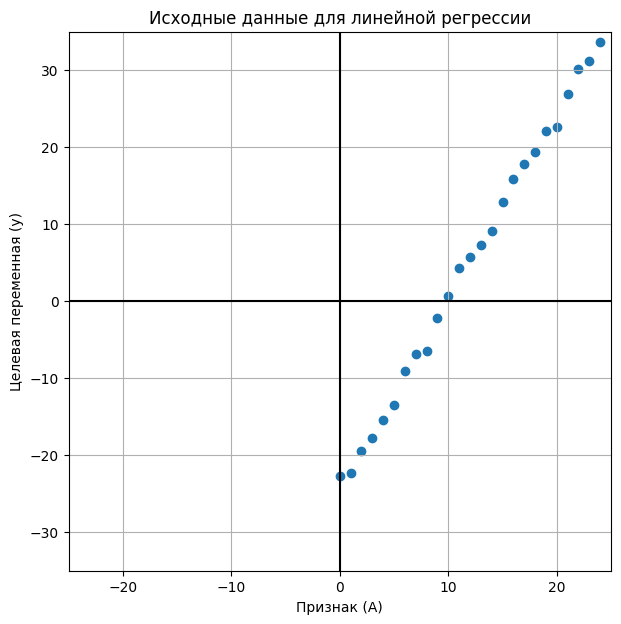

In [2]:
# ваши параметры по вариантам
n = 24
a_orig = (-1) ** n * 0.1 * n # по формуле (-1)^n * 0.1 * n, n - номер в списке группы
b_orig = n * (-1) ** (n + 1) # по формуле n*(-1)^(n+1), где n - номер в списке группы
random_state = n # х, где х - номер в списке группы

# это тот самый столбец который мы и должны отыскать будем нашими методами.
# сейчас конечно мы его знаем наперед потому что нам надо создать данные
# но в жизни мы изначально этих чисел не знаем и в жизни задача в том чтобы их найти
x_orig = np.array([a_orig, b_orig])

np.random.seed(random_state)

A = np.stack([np.arange(0, 25), np.ones(25)]).T

# @ - операция матричного умножения в библиотеке NumPy
y = A @ x_orig + np.random.standard_normal(25)
# добавили нормально распределённого шума в данных
# этим система станет несовместна для обычного решения

f, ax = plt.subplots(figsize=(7, 7))

# A[:, 0] - выбрать первый столбец, A[0, :] - выбрать первую строку
plt.scatter(A[:, 0], y, label='Данные (y)')

ax.set_xlim(-25, 25)
ax.set_ylim(-35, 35)
# рисуем координатные оси
ax.axvline(0, color="black")
ax.axhline(0, color="black")
ax.grid(True)
ax.set_title('Исходные данные для линейной регрессии')
ax.set_xlabel('Признак (A)')
ax.set_ylabel('Целевая переменная (y)')

In [9]:
A

array([[ 0.,  1.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 9.,  1.],
       [10.,  1.],
       [11.,  1.],
       [12.,  1.],
       [13.,  1.],
       [14.,  1.],
       [15.,  1.],
       [16.,  1.],
       [17.,  1.],
       [18.,  1.],
       [19.,  1.],
       [20.,  1.],
       [21.,  1.],
       [22.,  1.],
       [23.,  1.],
       [24.,  1.]])

In [10]:
y

array([-22.67078783, -22.37003345, -19.51628036, -17.79081039,
       -15.47081626, -13.43871328,  -9.03558315,  -6.90427811,
        -6.42640423,  -2.1804348 ,   0.6788048 ,   4.28927273,
         5.7615384 ,   7.3040112 ,   9.11883468,  12.85022853,
        15.85342467,  17.85773744,  19.36556161,  22.11501838,
        22.66306431,  26.96286114,  30.19285483,  31.13667202,
        33.72166836])

### Вопрос - зачем был дописан вектор единиц справа к иксу?

ответ - Вектор единиц дописывается к столбцу признаков для того, чтобы помимо искомого a(веса PS: наклона прямой к оси OX), можно было найти еще и свободный член b(смещение прямой по оси OY). А как можно увидеть выше, нам нужно перемножить вектор x, состоящий из двух элементов(a и b), на матрицу признаков A, но тк у нас в условии только один столбец признаков, для удачного умножения нужно дописать столбец единиц, чтобы после мы получили уравнение регресии со свободным членом b: y = ax + b

In [5]:
# допишите код для поиска a и b через 0 производной и выведите какой вышел результат
a_b_analytical = np.linalg.inv(A.T @ A) @ A.T @ y
a_b_analytical

array([  2.43648296, -24.27509905])

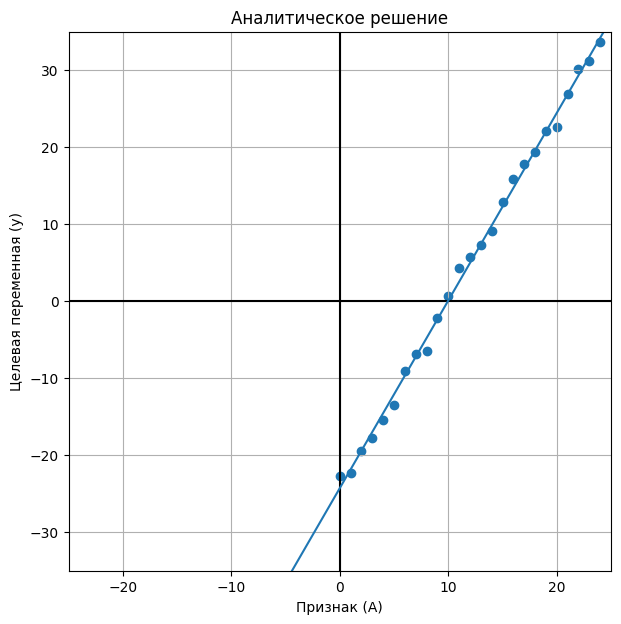

In [6]:
# постройте линию которая вышла рядом с изначальными данными


# изначальные данные
f, ax = plt.subplots(figsize=(7, 7))

plt.scatter(A[:, 0], y, label='Данные (y)')
ax.set_xlim(-25, 25)
ax.set_ylim(-35, 35)
ax.axvline(0, color='black')
ax.axhline(0, color='black')
ax.grid(True)
ax.set_title('Аналитическое решение')
ax.set_xlabel('Признак (A)')
ax.set_ylabel('Целевая переменная (y)')


# линия которая обучилась
# нужно вместо троеточий подсчитать значения y которые 
# получаются при полученных параметрах линии
# в точках x1 = -25, x2 = 25, этим мы построим линию по 2 точкам
ax.plot([-25, 25], [-25 * a_b_analytical[0] + a_b_analytical[1], 25 * a_b_analytical[0] + a_b_analytical[1]])


## 2. Решение с помощью градиентного спуска

С помощью найденных выше формул градиента, совершить шаги градиентного спуска для тех же данных.<br>
Подобрать значение $\alpha$, чтобы на графиках была видна сходимость за 10 шагов.<br> Начинаем с параметров 0, 0

Коэффициенты, получившиеся в результате градиентного спуска: [  2.43448698 -24.24254211]
Сравнение с коэффициентами, получвшимися аналитически: [  2.43648296 -24.27509905] 
И с исходными значениями: [  2.4 -24. ]


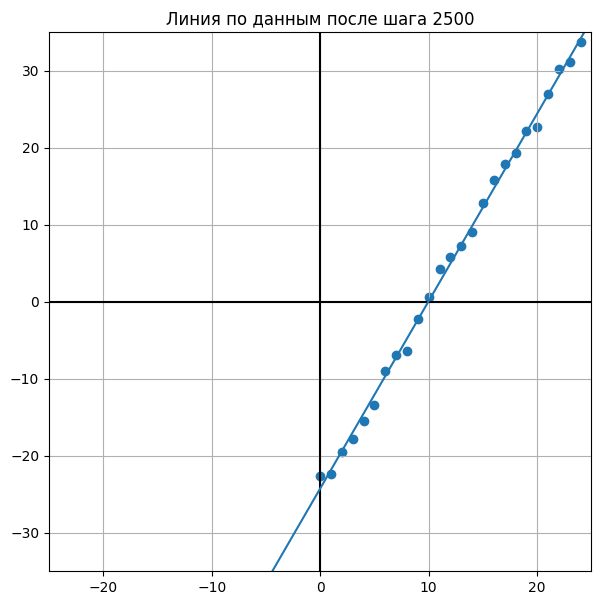

In [7]:
alpha = 0.0002
num_steps = 2500

a_b_grad_desc = np.array([0.0, 0.0])

for i in range(num_steps):
    # получаем градиент
    grad = 2 * A.T @ (A @ a_b_grad_desc - y)
    # получаем антиградиент
    antigrad = grad * alpha
    # обновляем наши параметры линии
    a_b_grad_desc -= antigrad
    
    # рисуем результат текущего шага
    
    #  - изначальные данные
print(f"Коэффициенты, получившиеся в результате градиентного спуска: {a_b_grad_desc}")
print(f"Сравнение с коэффициентами, получвшимися аналитически: {a_b_analytical} ")
print(f"И с исходными значениями: {x_orig}")
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(A[:, 0], y)
ax.set_xlim(-25, 25)
ax.set_ylim(-35, 35)
ax.axvline(0, color='black')
ax.axhline(0, color='black')
ax.grid(True)

    # - линия которая обучилась
ax.plot([-25, 25], [-25 * a_b_grad_desc[0] + a_b_grad_desc[1], 25 * a_b_grad_desc[0] + a_b_grad_desc[1]])
ax.set_title(f'Линия по данным после шага {i+1}')
plt.show()